EDA for Predict the fare amount of future rides using regression analysis:-

In [4]:
#load dataset
import pandas as pd
df = pd.read_csv('uber.csv')
print(df.head())


         id  fare_amount          pickup_datetime  pickup_longitude  \
0  24238194          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  27835199          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  44984355         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3  25894730          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4  17610152         16.0  2014-08-28 17:47:00 UTC        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  
3        40.790844         -73.965316         40.803349                3  
4        40.744085         -73.973082         40.761247                5  


In [ ]:
# understanding the data
print(df.describe())



                 id    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967153        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407        

In [ ]:
# Summary of missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Display missing data details
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage}))


                   Missing Values  Percentage
id                              0         0.0
key                             0         0.0
fare_amount                     0         0.0
pickup_datetime                 0         0.0
pickup_longitude                0         0.0
pickup_latitude                 0         0.0
dropoff_longitude               1        50.0
dropoff_latitude                1        50.0
passenger_count                 0         0.0


In [ ]:
# Drop rows with missing values
data_cleaned = df.dropna()

# Drop columns with more than 50% missing data
data_cleaned = df.dropna(axis=1, thresh=len(df) * 0.5)


In [ ]:
#delete column key
df.drop('key', axis=1, inplace=True)
print(df.head())

         id  fare_amount  pickup_longitude  pickup_latitude  \
0 -0.216957    -0.389826         -0.128712         0.103940   
1  0.007662    -0.369627         -0.128235         0.102628   
2  1.078562     0.155533         -0.129169         0.104253   
3 -0.113513    -0.612008         -0.126641         0.110738   
4 -0.630854     0.468608         -0.122173         0.104682   

   dropoff_longitude  dropoff_latitude  passenger_count  pickup_date  \
0          -0.112387          0.117638        -0.493895     1.693124   
1          -0.112021          0.121627        -0.493895    -1.452854   
2          -0.109570          0.124912        -0.493895    -1.396464   
3          -0.109780          0.129431         0.949114    -1.484017   
4          -0.110372          0.123235         2.392122     1.319168   

   pickup_time  pickup_hour  
0     0.901595           19  
1     0.934389           20  
2     1.190097           21  
3    -0.860981            8  
4     0.581916           17  


C:\Users\Harshitha_K\AppData\Local\Temp\ipykernel_15944\3684705787.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['passenger_count'])


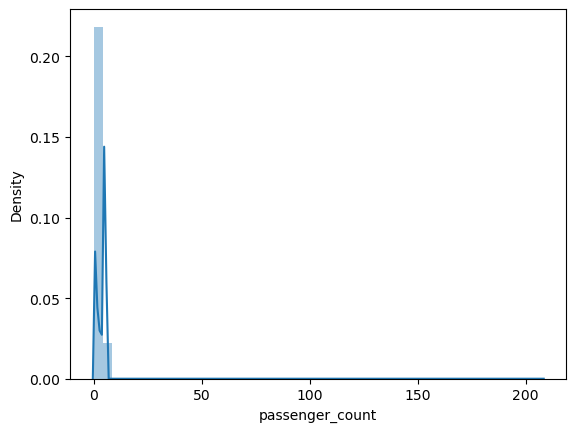

1152

In [ ]:
#Plot the distribution to understand its range and patterns.

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['passenger_count'])
plt.show()




In [ ]:
print(df['passenger_count'].value_counts())

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64


In [ ]:
print(df.dtypes)

id                   float64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
pickup_date          float64
pickup_time          float64
pickup_hour            int32
dtype: object


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#inspect dataset

print(df.head())


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('UBER.CSV')

# Convert the pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract date and time from pickup_datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time

# If the key column also contains datetime information, convert it to datetime format
df['key'] = pd.to_datetime(df['key'])

# Extract date and time from key
df['key_date'] = df['key'].dt.date
df['key_time'] = df['key'].dt.time

# Display the first few rows to verify the changes
print(df.head())

C:\Users\Harshitha_K\AppData\Local\Temp\ipykernel_12292\2625914856.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['key'] = pd.to_datetime(df['key'])


DateParseError: hour must be in 0..23: 52:06.0, at position 0

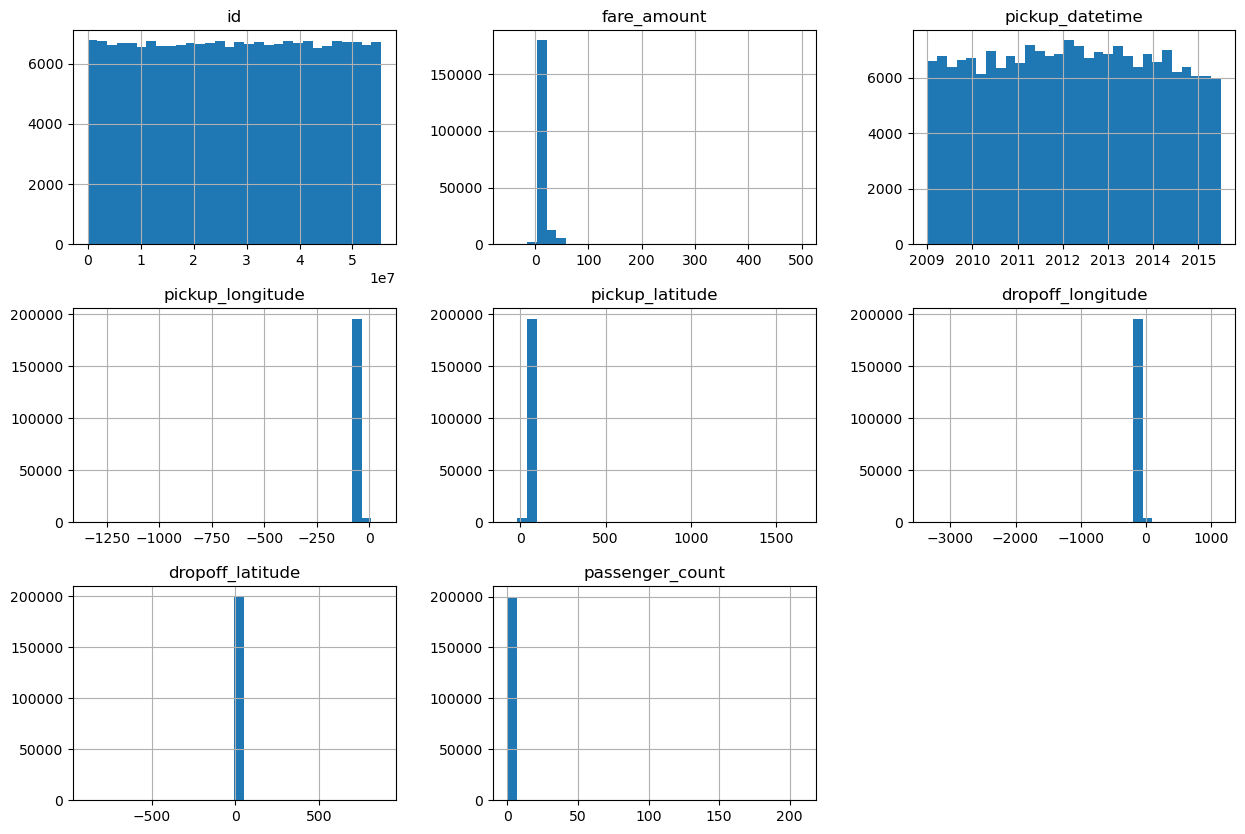

ValueError: could not convert string to float: '52:06.0'

<Figure size 1000x800 with 0 Axes>

In [ ]:
#data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Plot pairplot for numerical columns
sns.pairplot(df)
plt.show()

# Plot countplot for categorical columns (if any)
# sns.countplot(x='categorical_column', data=df)
# plt.show()


In [ ]:
df.head()

,id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,pickup_hour
0,-0.216957,-0.389826,-0.128712,0.103940,-0.112387,0.117638,-0.493895,1.693124,0.901595,19
1,0.007662,-0.369627,-0.128235,0.102628,-0.112021,0.121627,-0.493895,-1.452854,0.934389,20
2,1.078562,0.155533,-0.129169,0.104253,-0.109570,0.124912,-0.493895,-1.396464,1.190097,21
3,-0.113513,-0.612008,-0.126641,0.110738,-0.109780,0.129431,0.949114,-1.484017,-0.860981,8
4,-0.630854,0.468608,-0.122173,0.104682,-0.110372,0.123235,2.392122,1.319168,0.581916,17


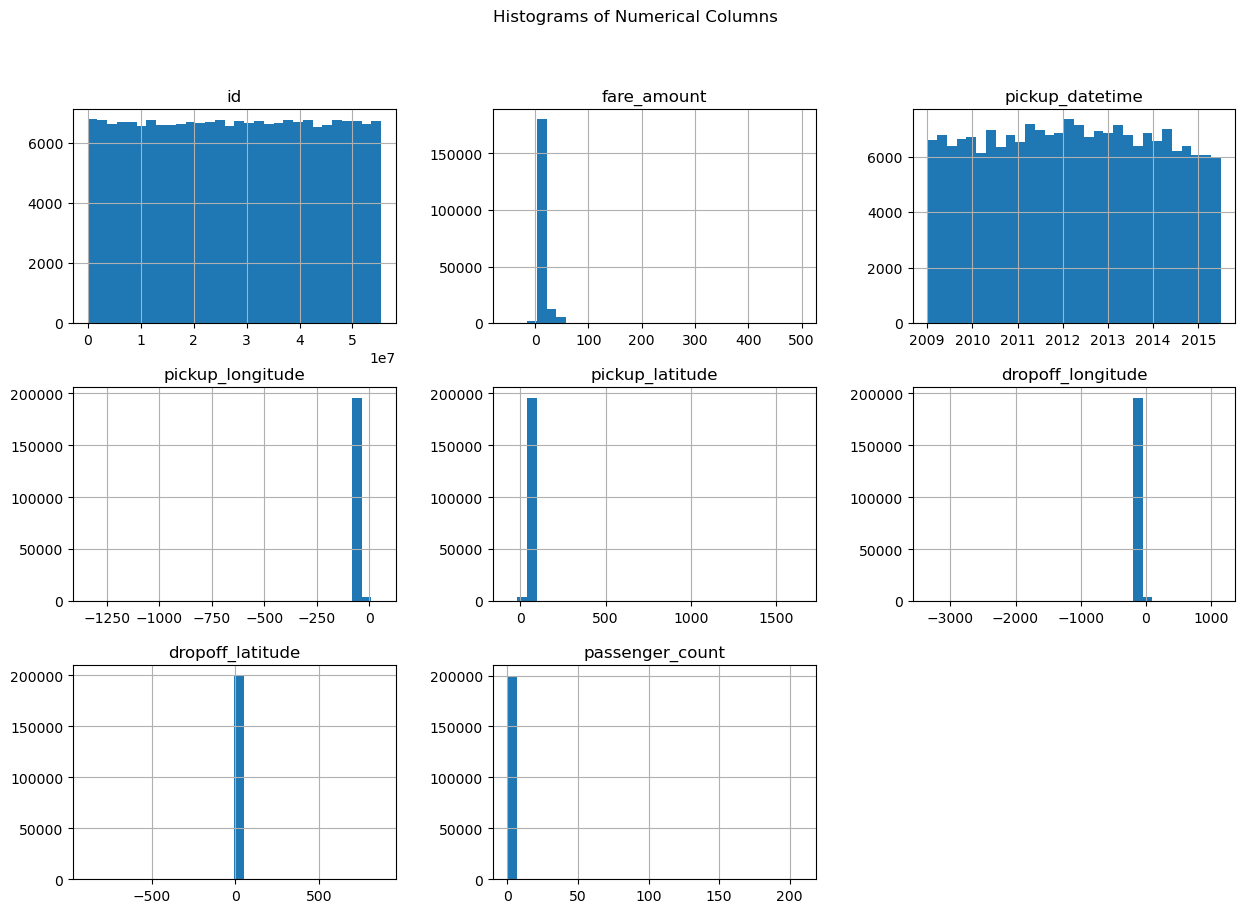

In [ ]:
# Plot histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [ ]:
# Plot pairplot for numerical columns
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

Derive new features for a regression model:

In [ ]:
# Time of Day


import pandas as pd

# Sample data
data = {'timestamp': ['2024-12-31 07:01:38', '2024-12-31 13:22:10', '2024-12-31 18:45:00']}
df = pd.DataFrame(data)

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour from timestamp
df['hour'] = df['timestamp'].dt.hour

# Define time of day categories
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create a new feature
df['time_of_day'] = df['hour'].apply(time_of_day)

print(df)

            timestamp  hour time_of_day
0 2024-12-31 07:01:38     7     morning
1 2024-12-31 13:22:10    13   afternoon
2 2024-12-31 18:45:00    18     evening


In [ ]:
#Distance Categories:- categorize it into different ranges such as short, medium, and long distances.



# Sample data
data = {'distance': [2.5, 10.0, 50.0]}
df = pd.DataFrame(data)

# Define distance categories
def distance_category(distance):
    if distance < 5:
        return 'short'
    elif 5 <= distance < 20:
        return 'medium'
    else:
        return 'long'

# Apply the function to create a new feature
df['distance_category'] = df['distance'].apply(distance_category)

print(df)

   distance distance_category
0       2.5             short
1      10.0            medium
2      50.0              long


In [ ]:
# create new features by combining existing ones
import pandas as pd

# Sample data
data = {'speed': [10, 20, 30], 'time': [1, 2, 3]}
# Use the existing 'data' variable
df = pd.DataFrame(data)

# Create a new feature for distance
df['distance'] = df['speed'] * df['time']

print(df)

   speed  time  distance
0     10     1        10
1     20     2        40
2     30     3        90


Split the Dataset :-
To evaluate the performance of your regression model, you need to split the dataset into training and testing sets.

In [ ]:
df.head()

,timestamp,hour,time_of_day
0,2024-12-31 07:01:38,7,morning
1,2024-12-31 13:22:10,13,afternoon
2,2024-12-31 18:45:00,18,evening


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('uber.csv')

# Convert the pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract date and time from pickup_datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Drop the original datetime columns if not needed
df = df.drop(columns=['pickup_datetime'])

# Convert date columns to numerical format
df['pickup_date'] = pd.to_datetime(df['pickup_date']).astype('int64') // 10**9  # Convert to Unix timestamp
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)  # Convert to seconds

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

# Select numerical columns for scaling
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Assuming 'fare_amount' is the column you want to predict
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Split the dataset into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train)
print (X_test)
print(y_train)
print(y_test)


              id  pickup_longitude  pickup_latitude  dropoff_longitude  \
21269   0.786252         -0.127983         0.104689          -0.110409   
187660  0.682821         -0.127562         0.106441          -0.111856   
774    -1.082326         -0.127260         0.103499          -0.108885   
184577  0.939571         -0.127989         0.105485          -0.110861   
37127  -0.986532         -0.127190         0.102006          -0.112458   
...          ...               ...              ...                ...   
119879 -1.626890         -0.126606         0.106173          -0.110342   
103694 -1.665507         -0.127632         0.105513          -0.111128   
131932  1.605801         -0.128104         0.106570          -0.112572   
146867  1.426427         -0.125280         0.106421          -0.109262   
121958  1.164437         -0.127767         0.108972          -0.108866   

        dropoff_latitude  passenger_count  pickup_date  pickup_time  \
21269           0.123228        -0.49389

In [ ]:
df.dtypes

id                   float64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
pickup_date          float64
pickup_time          float64
pickup_hour            int32
dtype: object

Correlation Analysis

                         id  fare_amount  pickup_longitude  pickup_latitude  \
id                 1.000000     0.000589          0.000230        -0.000341   
fare_amount        0.000589     1.000000          0.010457        -0.008481   
pickup_longitude   0.000230     0.010457          1.000000        -0.816461   
pickup_latitude   -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude  0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude   0.000271    -0.011014         -0.846324         0.702367   
passenger_count    0.002257     0.010150         -0.000414        -0.001560   
pickup_date       -0.001124     0.122778          0.009361        -0.009675   
pickup_time       -0.000040    -0.021808          0.002544        -0.003938   
pickup_hour        0.000042    -0.021473          0.002433        -0.003822   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
id                          0.000270          0.000271 

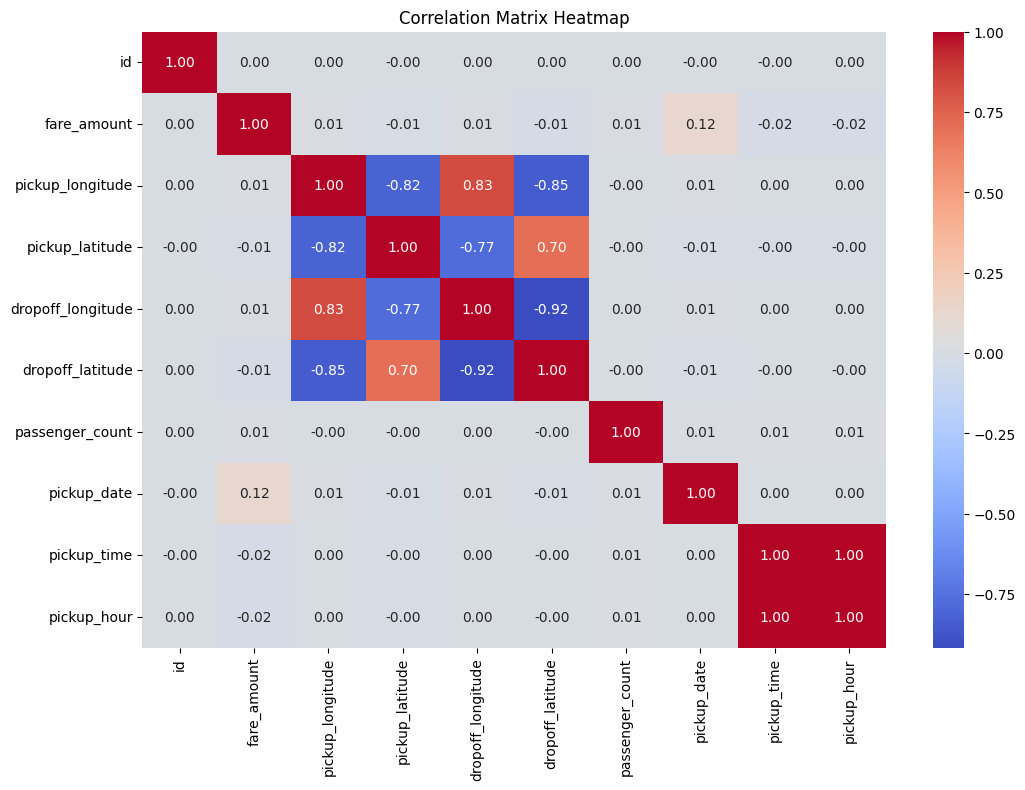

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('uber.csv')

# Convert the pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract date and time from pickup_datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Drop the original datetime columns if not needed
df = df.drop(columns=['pickup_datetime'])

# Convert date columns to numerical format
df['pickup_date'] = pd.to_datetime(df['pickup_date']).astype('int64') // 10**9  # Convert to Unix timestamp
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)  # Convert to seconds

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

# Select numerical columns for scaling
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Perform correlation analysis
correlation_matrix = df.corr()

#save correlation_matrix to csv file
correlation_matrix.to_csv('correlation_matrix.csv')

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

